# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


Essentially the columns of a dataframe, 1-D arrays like which allow labeling within every element in the array (useful app: time series)

In [5]:
from string import ascii_lowercase as letters

# Creating a series (from np.array), accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)


b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [6]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a   -0.775888
b   -0.300867
c   -0.578315
d   -0.830664
e    0.037482
dtype: float64
a         NaN
b   -0.601734
c   -1.156629
d   -1.661329
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [7]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2024,11,27,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 27 2024'
# or alternatively
date = '27/11/2024 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2024-11-27
2024-11-27 10:45:10.000015
27/11/2024 10:45:00
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-28 10:45:00',
               '2024-11-29 10:45:00', '2024-11-30 10:45:00',
               '2024-12-01 10:45:00', '2024-12-02 10:45:00',
               '2024-12-03 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 10:45:01',
               '2024-11-27 10:45:02', '2024-11-27 10:45:03',
               '2024-11-27 10:45:04', '2024-11-27 10:45:05',
               '2024-11-27 10:45:06', '2024-11-27 10:45:07',
               '2024-11-27 10:45:08', '2024-11-27 10:45:09',
               ...
               '2024-11-27 11:44:50', '2024-11-27 11:44:51',
               '2024-11-27 11:44:52', '2024-11-27 11:44:53',
               '2024-11-27 11:44:54', '2024-11-27 11:44:55',
               '2024-11-27 11:44:56', '2024-11-27 11:44:57',
               '2024-11-27 11:44:58', '2024-11-27 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [8]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)



1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [9]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2024-11-27':'2024-12-03'], '\n') # Note - includes end time


2024-11-27 10:45:00     8.579661
2024-11-28 10:45:00    11.705489
2024-11-29 10:45:00     9.437318
2024-11-30 10:45:00    10.875309
Freq: D, dtype: float64 

2024-11-27 10:45:00     8.579661
2024-11-28 10:45:00    11.705489
2024-11-29 10:45:00     9.437318
2024-11-30 10:45:00    10.875309
2024-12-01 10:45:00     8.196448
2024-12-02 10:45:00     7.923378
2024-12-03 10:45:00     8.667399
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [10]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [14]:
entries=10
dates=pd.date_range('11/27/2024 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2024-11-27 10:45:00,0.167571,-0.105602,0.473047,0.408120
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,-0.259721
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,1.036947
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,0.461557
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,-1.431812
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,-0.109077
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,-1.482392
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,-2.221683
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,-0.766553
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,-0.253239


or by means of a dictionary:


In [ ]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lengths (non si può fare)

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [17]:
df.head(2)

,A,B,C,D
2024-11-27 10:45:00,0.167571,-0.105602,0.473047,0.408120
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,-0.259721


In [18]:
df.tail(4)

,A,B,C,D
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,-1.482392
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,-2.221683
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,-0.766553
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,-0.253239


In [19]:
df.index

DatetimeIndex(['2024-11-27 10:45:00', '2024-11-27 11:45:00',
               '2024-11-27 12:45:00', '2024-11-27 13:45:00',
               '2024-11-27 14:45:00', '2024-11-27 15:45:00',
               '2024-11-27 16:45:00', '2024-11-27 17:45:00',
               '2024-11-27 18:45:00', '2024-11-27 19:45:00'],
              dtype='datetime64[ns]', freq='h')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [ ]:
df.values   # 2-D numpy array

array([[ 0.16757126, -0.10560173,  0.47304712,  0.40811979],
       [ 0.20675825, -0.51763724, -0.1320195 , -0.25972068],
       [-1.759514  , -0.67103616, -2.1412787 ,  1.0369469 ],
       [-0.79425596,  0.313286  ,  0.59754805,  0.46155728],
       [ 1.30148135, -1.21080734,  0.98255062, -1.43181229],
       [ 1.76016656, -1.86486518, -0.23108351, -0.10907713],
       [ 0.69852083, -0.9960553 , -0.83789233, -1.48239239],
       [ 0.4345249 ,  1.32904307, -1.80030528, -2.2216831 ],
       [-0.89555709,  0.83104343, -0.80629683, -0.76655265],
       [ 1.22566607, -0.45708094,  1.21556604, -0.2532392 ]])

In [22]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.234536,-0.334971,-0.268016,-0.461785
std,1.106574,0.960746,1.133073,1.013077
min,-1.759514,-1.864865,-2.141279,-2.221683
25%,-0.553799,-0.914801,-0.829993,-1.265497
50%,0.320642,-0.487359,-0.181552,-0.256480
75%,1.093880,0.208564,0.566423,0.278821
max,1.760167,1.329043,1.215566,1.036947


In [ ]:
df.T    # transpose operation

,2024-11-27 10:45:00,2024-11-27 11:45:00,2024-11-27 12:45:00,2024-11-27 13:45:00,2024-11-27 14:45:00,2024-11-27 15:45:00,2024-11-27 16:45:00,2024-11-27 17:45:00,2024-11-27 18:45:00,2024-11-27 19:45:00
A,0.167571,0.206758,-1.759514,-0.794256,1.301481,1.760167,0.698521,0.434525,-0.895557,1.225666
B,-0.105602,-0.517637,-0.671036,0.313286,-1.210807,-1.864865,-0.996055,1.329043,0.831043,-0.457081
C,0.473047,-0.132019,-2.141279,0.597548,0.982551,-0.231084,-0.837892,-1.800305,-0.806297,1.215566
D,0.408120,-0.259721,1.036947,0.461557,-1.431812,-0.109077,-1.482392,-2.221683,-0.766553,-0.253239


In [28]:
df.sort_index(axis=0,ascending=True)

,A,B,C,D
2024-11-27 10:45:00,0.167571,-0.105602,0.473047,0.408120
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,-0.259721
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,1.036947
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,0.461557
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,-1.431812
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,-0.109077
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,-1.482392
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,-2.221683
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,-0.766553
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,-0.253239


In [29]:
df.sort_values(by="C")

,A,B,C,D
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,1.036947
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,-2.221683
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,-1.482392
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,-0.766553
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,-0.109077
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,-0.259721
2024-11-27 10:45:00,0.167571,-0.105602,0.473047,0.408120
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,0.461557
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,-1.431812
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,-0.253239


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [30]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2024-11-27 10:45:00    0.167571
2024-11-27 11:45:00    0.206758
2024-11-27 12:45:00   -1.759514
2024-11-27 13:45:00   -0.794256
2024-11-27 14:45:00    1.301481
2024-11-27 15:45:00    1.760167
2024-11-27 16:45:00    0.698521
2024-11-27 17:45:00    0.434525
2024-11-27 18:45:00   -0.895557
2024-11-27 19:45:00    1.225666
Freq: h, Name: A, dtype: float64 

2024-11-27 10:45:00    0.167571
2024-11-27 11:45:00    0.206758
2024-11-27 12:45:00   -1.759514
2024-11-27 13:45:00   -0.794256
2024-11-27 14:45:00    1.301481
2024-11-27 15:45:00    1.760167
2024-11-27 16:45:00    0.698521
2024-11-27 17:45:00    0.434525
2024-11-27 18:45:00   -0.895557
2024-11-27 19:45:00    1.225666
Freq: h, Name: A, dtype: float64


In [31]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2024-11-27 10:45:00":"2024-11-27 12:45:00"])

                            A         B         C         D
2024-11-27 10:45:00  0.167571 -0.105602  0.473047  0.408120
2024-11-27 11:45:00  0.206758 -0.517637 -0.132019 -0.259721
2024-11-27 12:45:00 -1.759514 -0.671036 -2.141279  1.036947
                            A         B         C         D
2024-11-27 10:45:00  0.167571 -0.105602  0.473047  0.408120
2024-11-27 11:45:00  0.206758 -0.517637 -0.132019 -0.259721
2024-11-27 12:45:00 -1.759514 -0.671036 -2.141279  1.036947


### Selection by label

In [32]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.167571
B   -0.105602
C    0.473047
D    0.408120
Name: 2024-11-27 10:45:00, dtype: float64

In [33]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2024-11-27 10:45:00,0.167571,-0.105602
2024-11-27 11:45:00,0.206758,-0.517637
2024-11-27 12:45:00,-1.759514,-0.671036
2024-11-27 13:45:00,-0.794256,0.313286
2024-11-27 14:45:00,1.301481,-1.210807
2024-11-27 15:45:00,1.760167,-1.864865
2024-11-27 16:45:00,0.698521,-0.996055
2024-11-27 17:45:00,0.434525,1.329043
2024-11-27 18:45:00,-0.895557,0.831043
2024-11-27 19:45:00,1.225666,-0.457081


In [34]:
# showing label slicing, both endpoints are included:
df.loc['2024-11-27 14:45:00':'2024-11-27 16:45:00',['A','B']]

,A,B
2024-11-27 14:45:00,1.301481,-1.210807
2024-11-27 15:45:00,1.760167,-1.864865
2024-11-27 16:45:00,0.698521,-0.996055


In [40]:
# getting an individual element
print (df.loc[dates], '\n')

print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

                            A         B         C         D
2024-11-27 10:45:00  0.167571 -0.105602  0.473047  0.408120
2024-11-27 11:45:00  0.206758 -0.517637 -0.132019 -0.259721
2024-11-27 12:45:00 -1.759514 -0.671036 -2.141279  1.036947
2024-11-27 13:45:00 -0.794256  0.313286  0.597548  0.461557
2024-11-27 14:45:00  1.301481 -1.210807  0.982551 -1.431812
2024-11-27 15:45:00  1.760167 -1.864865 -0.231084 -0.109077
2024-11-27 16:45:00  0.698521 -0.996055 -0.837892 -1.482392
2024-11-27 17:45:00  0.434525  1.329043 -1.800305 -2.221683
2024-11-27 18:45:00 -0.895557  0.831043 -0.806297 -0.766553
2024-11-27 19:45:00  1.225666 -0.457081  1.215566 -0.253239 

0.20675825203370174
0.20675825203370174


### Selecting by position

In [41]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python (row,col format)
print (df.iloc[3:5,0:2])

A   -0.794256
B    0.313286
C    0.597548
D    0.461557
Name: 2024-11-27 13:45:00, dtype: float64 

                            A         B
2024-11-27 13:45:00 -0.794256  0.313286
2024-11-27 14:45:00  1.301481 -1.210807


In [43]:
# selecting rows 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2024-11-27 11:45:00,0.206758,-0.132019
2024-11-27 12:45:00,-1.759514,-2.141279
2024-11-27 14:45:00,1.301481,0.982551


In [44]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])

# selecting an individual element by position
print(df.iloc[1,1])

                            A         B         C         D
2024-11-27 11:45:00  0.206758 -0.517637 -0.132019 -0.259721
2024-11-27 12:45:00 -1.759514 -0.671036 -2.141279  1.036947 

                            B         C
2024-11-27 10:45:00 -0.105602  0.473047
2024-11-27 11:45:00 -0.517637 -0.132019
2024-11-27 12:45:00 -0.671036 -2.141279
2024-11-27 13:45:00  0.313286  0.597548
2024-11-27 14:45:00 -1.210807  0.982551
2024-11-27 15:45:00 -1.864865 -0.231084
2024-11-27 16:45:00 -0.996055 -0.837892
2024-11-27 17:45:00  1.329043 -1.800305
2024-11-27 18:45:00  0.831043 -0.806297
2024-11-27 19:45:00 -0.457081  1.215566
-0.517637239874603


### Boolean index

Very powerful way of **filtering** out data with certain features. Notation is very similar to numpy arrays.

In [45]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,0.461557
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,-2.221683
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,-0.766553


In [53]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,0.473047,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,0.206758,NaN,NaN,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,NaN,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,NaN,0.313286,0.597548,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.301481,NaN,0.982551,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.760167,NaN,NaN,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.698521,NaN,NaN,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.434525,1.329043,NaN,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,NaN,0.831043,NaN,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,1.225666,NaN,1.215566,5.0,4.5,18.0,0.996917


In [59]:
df.isna()

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,False,False,False,False,False,False,False
2024-11-27 11:45:00,False,False,False,False,False,False,False
2024-11-27 12:45:00,False,False,False,False,False,False,False
2024-11-27 13:45:00,False,False,False,False,False,False,False
2024-11-27 14:45:00,False,False,False,False,False,False,False
2024-11-27 15:45:00,False,False,False,False,False,False,False
2024-11-27 16:45:00,False,False,False,False,False,False,False
2024-11-27 17:45:00,False,False,False,False,False,False,False
2024-11-27 18:45:00,False,False,False,False,False,False,False
2024-11-27 19:45:00,False,False,False,False,False,False,False


### Setting

Combination of selection and setting of values

In [ ]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array, going to set all of the elements of column D equal to 5
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column, we define a new variable that we call E and add it to the df
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
#   we can also define it through a series and directly set it equal to the column
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,10,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,5.0,4.0,16,0.997564
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,18,0.996917


In [ ]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)

df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df
# we can directly define new columns by applying operators to already present values

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,10,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,5.0,4.0,16,0.997564
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,18,0.996917


In [62]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,-0.473047,-5.0,0.0,0,-1.000000
2024-11-27 11:45:00,-0.206758,-0.517637,-0.132019,-5.0,-0.5,-2,-0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,-5.0,-1.0,-4,-0.999848
2024-11-27 13:45:00,-0.794256,-0.313286,-0.597548,-5.0,-1.5,-6,-0.999657
2024-11-27 14:45:00,-1.301481,-1.210807,-0.982551,-5.0,-2.0,-8,-0.999391
2024-11-27 15:45:00,-1.760167,-1.864865,-0.231084,-5.0,-2.5,-10,-0.999048
2024-11-27 16:45:00,-0.698521,-0.996055,-0.837892,-5.0,-3.0,-12,-0.998630
2024-11-27 17:45:00,-0.434525,-1.329043,-1.800305,-5.0,-3.5,-14,-0.998135
2024-11-27 18:45:00,-0.895557,-0.831043,-0.806297,-5.0,-4.0,-16,-0.997564
2024-11-27 19:45:00,-1.225666,-0.457081,-1.215566,-5.0,-4.5,-18,-0.996917


### Are you dealing with a Copy or a View?

In general is hard to tell...

In [72]:
dfd = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

# This is likely a view
subset = dfd.loc[0:1, 'a']  
subset[0] = 100  # May affect `df`

print (dfd)

# This is a copy
subset = dfd.loc[[0, 1], 'a']  
subset[0] = 200  # Does NOT affect `df`

print (dfd)

     a  b
0  100  4
1    2  5
2    3  6
     a  b
0  100  4
1    2  5
2    3  6


The behaviour depend on the version of Pandas and on the version of Numpy that given version of Pandas depends upon. Since Pandas 1.5 "Copy-on-Write" (CoW) is (optionally) available and as of Pandas 3.0 will be the default. 

With CoW chained assignemt will never work; in the following example, the view `df["foo"]` and `df` itself are modified in one step. This will lead to a `ChainedAssignemntError`  

In [65]:
dfd["a"][dfd["b"] > 5] = 100
dfd

/var/folders/gs/gq30q7ps44jdqztv6g2t9vg00000gn/T/ipykernel_38764/449088826.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dfd["a"][dfd["b"] > 5] = 100


,a,b
0,100,4
1,2,5
2,100,6


With copy on write this can be done by using `loc`

In [73]:
dfd.loc[dfd["b"] > 5, "a"] = 200
dfd

,a,b
0,100,4
1,2,5
2,200,6


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [74]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,1.000000
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,5.0,0.5,0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,5.0,1.0,0.999848
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,5.0,1.5,0.999657
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,5.0,2.0,0.999391
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,0.998135
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,5.0,4.0,0.997564
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,0.996917


In [75]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,10,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,5.0,4.0,16,0.997564
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,18,0.996917


In [76]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,10,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,5.0,4.0,16,0.997564
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,18,0.996917


In [77]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2024-11-27 18:45:00"))

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,10,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,14,0.998135
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [78]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,NaN,NaN,0.473047,5.0,NaN,NaN,1.000000
2024-11-27 11:45:00,0.206758,NaN,NaN,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,NaN,NaN,NaN,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,NaN,0.313286,0.597548,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.301481,NaN,0.982551,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.760167,NaN,NaN,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.698521,NaN,NaN,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.434525,1.329043,NaN,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,NaN,0.831043,NaN,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,1.225666,NaN,1.215566,5.0,4.5,18.0,0.996917


In [79]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine


In [80]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,True,True,False,False,True,True,False
2024-11-27 11:45:00,False,True,True,False,False,False,False
2024-11-27 12:45:00,True,True,True,False,False,False,False
2024-11-27 13:45:00,True,False,False,False,False,False,False
2024-11-27 14:45:00,False,True,False,False,False,False,False
2024-11-27 15:45:00,False,True,True,False,False,False,False
2024-11-27 16:45:00,False,True,True,False,False,False,False
2024-11-27 17:45:00,False,False,True,False,False,False,False
2024-11-27 18:45:00,True,False,True,False,False,False,False
2024-11-27 19:45:00,False,True,False,False,False,False,False


In [81]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,0.000000,0.473047,5.0,0.0,0.0,1.000000
2024-11-27 11:45:00,0.206758,0.000000,0.000000,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,0.000000,0.000000,0.000000,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,0.000000,0.313286,0.597548,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.301481,0.000000,0.982551,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.760167,0.000000,0.000000,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.698521,0.000000,0.000000,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.434525,1.329043,0.000000,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,0.000000,0.831043,0.000000,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,1.225666,0.000000,1.215566,5.0,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [88]:
df_bfill = df_wNan.fillna(method='bfill')
df_pad = df_bfill.fillna(method='pad')
df_pad

/var/folders/gs/gq30q7ps44jdqztv6g2t9vg00000gn/T/ipykernel_38764/1093159892.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df_wNan.fillna(method='bfill')
/var/folders/gs/gq30q7ps44jdqztv6g2t9vg00000gn/T/ipykernel_38764/1093159892.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pad = df_bfill.fillna(method='pad')


,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.206758,0.313286,0.473047,5.0,0.5,2.0,1.000000
2024-11-27 11:45:00,0.206758,0.313286,0.597548,5.0,0.5,2.0,0.999962
2024-11-27 12:45:00,1.301481,0.313286,0.597548,5.0,1.0,4.0,0.999848
2024-11-27 13:45:00,1.301481,0.313286,0.597548,5.0,1.5,6.0,0.999657
2024-11-27 14:45:00,1.301481,1.329043,0.982551,5.0,2.0,8.0,0.999391
2024-11-27 15:45:00,1.760167,1.329043,1.215566,5.0,2.5,10.0,0.999048
2024-11-27 16:45:00,0.698521,1.329043,1.215566,5.0,3.0,12.0,0.998630
2024-11-27 17:45:00,0.434525,1.329043,1.215566,5.0,3.5,14.0,0.998135
2024-11-27 18:45:00,1.225666,0.831043,1.215566,5.0,4.0,16.0,0.997564
2024-11-27 19:45:00,1.225666,0.831043,1.215566,5.0,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast due to several intrinsic optimizations:

* They are implemented in C/Cython via NumPy.
* Pandas processes columns as contiguous memory arrays.
* Vectorized operations eliminate the need for slow Python loops.
* Efficient memory and cache utilization boost performance.


In [89]:
# Some statistics (mean() just as an example)
# rows
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.217779
B         -0.334971
C         -0.268016
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2024-11-27 10:45:00    0.909635
2024-11-27 11:45:00    1.151009
2024-11-27 12:45:00    0.918288
2024-11-27 13:45:00    1.945176
2024-11-27 14:45:00    2.438945
2024-11-27 15:45:00    2.594752
2024-11-27 16:45:00    2.837600
2024-11-27 17:45:00    3.351628
2024-11-27 18:45:00    3.589536
2024-11-27 19:45:00    4.354438
Freq: h, dtype: float64 



In [90]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.206758,-0.623239,0.341028,10.0,0.5,2,1.999962
2024-11-27 12:45:00,-1.552756,-1.294275,-1.800251,15.0,1.5,6,2.999810
2024-11-27 13:45:00,-2.347012,-0.980989,-1.202703,20.0,3.0,12,3.999467
2024-11-27 14:45:00,-1.045530,-2.191796,-0.220152,25.0,5.0,20,4.998858
2024-11-27 15:45:00,0.714636,-4.056662,-0.451236,30.0,7.5,30,5.997906
2024-11-27 16:45:00,1.413157,-5.052717,-1.289128,35.0,10.5,42,6.996536
2024-11-27 17:45:00,1.847682,-3.723674,-3.089434,40.0,14.0,56,7.994670
2024-11-27 18:45:00,0.952125,-2.892630,-3.895730,45.0,18.0,72,8.992234
2024-11-27 19:45:00,2.177791,-3.349711,-2.680164,50.0,22.5,90,9.989152


In [91]:
df

,A,B,C,D,E,E prime,cosine
2024-11-27 10:45:00,0.000000,-0.105602,0.473047,5.0,0.0,0,1.000000
2024-11-27 11:45:00,0.206758,-0.517637,-0.132019,5.0,0.5,2,0.999962
2024-11-27 12:45:00,-1.759514,-0.671036,-2.141279,5.0,1.0,4,0.999848
2024-11-27 13:45:00,-0.794256,0.313286,0.597548,5.0,1.5,6,0.999657
2024-11-27 14:45:00,1.301481,-1.210807,0.982551,5.0,2.0,8,0.999391
2024-11-27 15:45:00,1.760167,-1.864865,-0.231084,5.0,2.5,10,0.999048
2024-11-27 16:45:00,0.698521,-0.996055,-0.837892,5.0,3.0,12,0.998630
2024-11-27 17:45:00,0.434525,1.329043,-1.800305,5.0,3.5,14,0.998135
2024-11-27 18:45:00,-0.895557,0.831043,-0.806297,5.0,4.0,16,0.997564
2024-11-27 19:45:00,1.225666,-0.457081,1.215566,5.0,4.5,18,0.996917


In [92]:
df.apply(lambda x: x.max() - x.min())

A           3.519681
B           3.193908
C           3.356845
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [93]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2024-11-27 10:45:00   -0.105602
2024-11-27 11:45:00   -0.310879
2024-11-27 12:45:00   -2.430550
2024-11-27 13:45:00   -0.480970
2024-11-27 14:45:00    0.090674
2024-11-27 15:45:00   -0.104699
2024-11-27 16:45:00   -0.297534
2024-11-27 17:45:00    1.763568
2024-11-27 18:45:00   -0.064514
2024-11-27 19:45:00    0.768585
Freq: h, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [94]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="~/data/data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [95]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [96]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [97]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

For tasks on extremely large datasets, libraries like [Polars](https://docs.pola.rs) or [Dask](https://www.dask.org) can offer even faster alternatives by further parallelizing or optimizing columnar operations.

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [98]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.104491,0.414531,0.425526,0.499284
1,-0.360425,0.236590,0.181947,0.574277
2,1.759466,-1.117229,0.179265,-0.231240
3,-0.116563,2.355662,-0.377331,-0.204957
4,-0.165377,-0.469360,-0.274113,-1.955493
5,1.548593,0.168617,1.634333,-1.240900
6,0.296751,0.364289,1.530465,0.667259
7,0.268787,0.104520,2.211048,1.004549
8,1.038155,-0.334156,-1.241502,0.340619
9,-1.911839,-0.162394,0.609985,0.272209


In [99]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.104491  0.414531  0.425526  0.499284
 1 -0.360425  0.236590  0.181947  0.574277
 2  1.759466 -1.117229  0.179265 -0.231240,
           0         1         2         3
 3 -0.116563  2.355662 -0.377331 -0.204957
 4 -0.165377 -0.469360 -0.274113 -1.955493
 5  1.548593  0.168617  1.634333 -1.240900
 6  0.296751  0.364289  1.530465  0.667259,
           0         1         2         3
 7  0.268787  0.104520  2.211048  1.004549
 8  1.038155 -0.334156 -1.241502  0.340619
 9 -1.911839 -0.162394  0.609985  0.272209]

In [ ]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.104491,0.414531,0.425526,0.499284
1,-0.360425,0.236590,0.181947,0.574277
2,1.759466,-1.117229,0.179265,-0.231240
3,-0.116563,2.355662,-0.377331,-0.204957
4,-0.165377,-0.469360,-0.274113,-1.955493
5,1.548593,0.168617,1.634333,-1.240900
6,0.296751,0.364289,1.530465,0.667259
7,0.268787,0.104520,2.211048,1.004549
8,1.038155,-0.334156,-1.241502,0.340619
9,-1.911839,-0.162394,0.609985,0.272209


In [106]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,1.104491,0.414531,0.425526,0.499284
1,-0.360425,0.236590,0.181947,0.574277
2,1.759466,-1.117229,0.179265,-0.231240
3,-0.116563,2.355662,-0.377331,-0.204957
4,-0.165377,-0.469360,-0.274113,-1.955493
5,1.548593,0.168617,1.634333,-1.240900
6,0.296751,0.364289,1.530465,0.667259
7,0.268787,0.104520,2.211048,1.004549
8,1.038155,-0.334156,-1.241502,0.340619
9,-1.911839,-0.162394,0.609985,0.272209


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples.

#### Merging, Inner Join (default)

Only rows with matching id values are included:

In [109]:
import pandas as pd

df1 = pd.DataFrame({'id': [1, 2, 3], 'name': ['Alice', 'Bob', 'Charlie']})
df2 = pd.DataFrame({'id': [2, 3, 4], 'age': [25, 30, 35]})

print (df1, '\n', df2, '\n')

# Merge on the 'id' column
result = pd.merge(df1, df2, on='id')
result

   id     name
0   1    Alice
1   2      Bob
2   3  Charlie 
    id  age
0   2   25
1   3   30
2   4   35 



,id,name,age
0,2,Bob,25
1,3,Charlie,30


#### Merging, Left Join

A left join includes all rows from `df1` (left) and fills in `NaN` for missing matches in `df2`.

In [110]:
result = pd.merge(df1, df2, on='id', how='left')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0


#### Merging, Outer Join

An outer join includes all rows from both DataFrames, filling NaN for missing values

In [111]:
result = pd.merge(df1, df2, on='id', how='outer')
print(result)

   id     name   age
0   1    Alice   NaN
1   2      Bob  25.0
2   3  Charlie  30.0
3   4      NaN  35.0


`join` is similar to `merge` but uses index as key and has 'Left' as default

In [112]:
df1 = pd.DataFrame({'name': ['Alice', 'Bob', 'Charlie']}, index=[1, 2, 3])
df2 = pd.DataFrame({'age': [25, 30, 35]}, index=[2, 3, 4])

result = df1.join(df2)
print(result)


      name   age
1    Alice   NaN
2      Bob  25.0
3  Charlie  30.0


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

Let's go through a few examples:

In [113]:
data = {
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
}

df = pd.DataFrame(data)

# Group by 'Category' and calculate the sum
result = df.groupby('Category').sum()
print(result)


          Values
Category        
A             90
B             60
C             60


In [114]:
# Multiple Aggregations
result = df.groupby('Category').agg(['sum', 'mean'])
print(result)

         Values      
            sum  mean
Category             
A            90  30.0
B            60  30.0
C            60  60.0


In [115]:
# Grouping by multiple columns
df = pd.DataFrame({'Category': ['A', 'A', 'B', 'B', 'C', 'C'],
                   'Type': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'Values': [10, 20, 30, 40, 50, 60]})

result = df.groupby(['Category', 'Type']).sum()
print(result)


               Values
Category Type        
A        X         10
         Y         20
B        X         30
         Y         40
C        X         50
         Y         60


In [116]:
# Trasformations using groupby(): add group averages to DataFrame
df['Group_Avg'] = df.groupby('Category')['Values'].transform('mean')
print(df)

  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
2        B    X      30       35.0
3        B    Y      40       35.0
4        C    X      50       55.0
5        C    Y      60       55.0


In [121]:
# filtering
filtered = df.groupby('Category').filter(lambda x: x['Values'].sum() > 50)
filtered

,Category,Type,Values,Group_Avg
2,B,X,30,35.0
3,B,Y,40,35.0
4,C,X,50,55.0
5,C,Y,60,55.0


In [120]:
# custom aggregation with apply()
def custom_aggregation(group):
    return pd.Series({
        'Sum': group['Values'].sum(),
        'Max': group['Values'].max(),
        'Count': group['Values'].count()
    })

result = df.groupby('Category').apply(custom_aggregation)
result

/var/folders/gs/gq30q7ps44jdqztv6g2t9vg00000gn/T/ipykernel_38764/674259557.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('Category').apply(custom_aggregation)


,Sum,Max,Count
Category,,,
A,30,20,2
B,70,40,2
C,110,60,2


In [119]:
# splitting data into groups
grouped = df.groupby('Category')

for name, group in grouped:
    print(f"Group: {name}")
    print(group)


Group: A
  Category Type  Values  Group_Avg
0        A    X      10       15.0
1        A    Y      20       15.0
Group: B
  Category Type  Values  Group_Avg
2        B    X      30       35.0
3        B    Y      40       35.0
Group: C
  Category Type  Values  Group_Avg
4        C    X      50       55.0
5        C    Y      60       55.0


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [122]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.276178
       two       0.467661
baz    one      -1.173737
       two       0.480240
foo    one       0.036902
       two      -0.317479
qux    one      -1.072920
       two      -1.564789
dtype: float64


In [123]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -2.231410  0.409002
    three -0.260628 -1.264690
    two    1.206989 -0.324289
foo one    0.236411 -0.208072
    three -0.165900 -0.937150
    two    1.116675 -1.616491

In [124]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -2.231410
            D    0.409002
     three  C   -0.260628
            D   -1.264690
     two    C    1.206989
            D   -0.324289
foo  one    C    0.236411
            D   -0.208072
     three  C   -0.165900
            D   -0.937150
     two    C    1.116675
            D   -1.616491
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<Axes: >

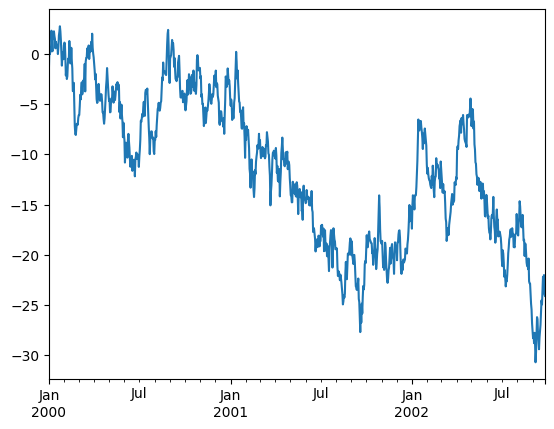

In [125]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 640x480 with 0 Axes>

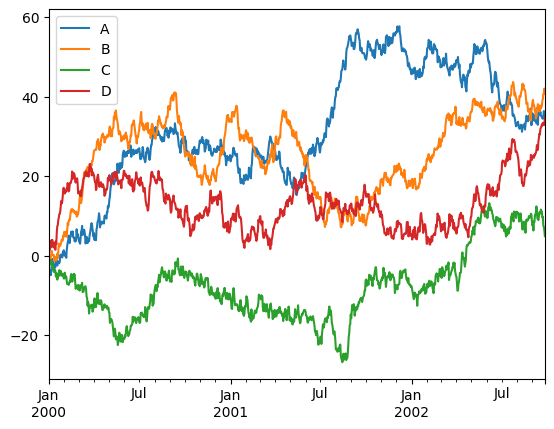

In [126]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')